# Machine learning Classification Task

**PLEASE READ CAREFULLY:**

This assignment is simple - use the same data used in class (the link is below), and run all the codes used to arrive at the trained model. 

But in your case, you DO NOT have to repeat the LogisticRegression or RandomForestClassifier algorithms, RATHER **use a DecisionTreeClassifier.**

Secondly, **DROP the "flee" column  before training your DecisionTree model.** 


Hint:

from sklearn.trees import DecisionTreeClassifier


After training the model, that is: model.fit(X, y)
use it to **make predictions on the X_test.** 

**Evaluate the performance of the model using F1-Score and Confusion Matrix.**

Hint:

from sklearn.metrics import f1_score, confusion matrix



When you are done, push your notebook to GitHub and submit the link using this form. 

[It will be very helpful to rewatch the video once it's available]. 

DEADLINE:
7th May, 2022. 11:59 pm WAT

DATA:
https://drive.google.com/file/d/1ToTHnITzEMILW7GMGONqtfBnyLOUQZiz/view?usp=drivesdk

Don't fail to ask questions if your are stuck or confused. 

GOOD LUCK!



---



---



In [ ]:
#mounting my Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [143]:
#Loading all needed libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [144]:
#calling and saving the dataset as a variable
data = pd.read_csv("police.csv")

In [171]:
#having a quick look at the data
data.head(3)

,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,label
0,shot,gun,53.0,M,Asian,WA,True,attack,Not fleeing,False,Guns,2015,0
1,shot,gun,47.0,M,White,OR,False,attack,Not fleeing,False,Guns,2015,0
2,shot and Tasered,unarmed,23.0,M,Hispanic,KS,False,other,Not fleeing,False,Unarmed,2015,1


In [146]:
#splitting the data into train and test subsets
train, test = train_test_split(data, test_size = 0.3, shuffle=True, random_state = 20)

In [147]:
#resetting the shuffled index
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [148]:
#specifying which columns that will be encoded and according to their respective types
label_cols = ["manner_of_death", "armed", "state","threat_level","flee",\
              "arms_category", "signs_of_mental_illness", "body_camera"]

onehot_cols = ["gender", "race"]

In [149]:
#initiating both types of encoding
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder()

#performing the label encoding
train[label_cols] = train[label_cols].apply(labelencoder.fit_transform)
test[label_cols] = test[label_cols].apply(labelencoder.fit_transform)

#performing the onehot encoding and extrapolating the names of its new columns
onehot_encoded_train = onehotencoder.fit_transform(train[onehot_cols]).toarray()
onehot_encoded_test = onehotencoder.fit_transform(test[onehot_cols]).toarray()
feature_names = onehotencoder.get_feature_names_out(onehot_cols)

#using the extracted column names to reform a new dataframe
onehot_encoded_traindata = pd.DataFrame(onehot_encoded_train, columns=[feature_names])
onehot_encoded_testdata = pd.DataFrame(onehot_encoded_test, columns=[feature_names])

#appending the new dataframe to each respective original dataset
train_data = pd.concat([train, onehot_encoded_traindata], axis = 1)
test_data = pd.concat([test, onehot_encoded_testdata], axis = 1)

#dropping the former columns which have been encoded using the onehot encoding method
train_data.drop(["gender", "race"], axis=1, inplace = True)
test_data.drop(["gender", "race"], axis=1, inplace = True)

#confirming the shape of the new sub-datasets
print(train_data.shape)
print(test_data.shape)

(3426, 19)
(1469, 19)


In [150]:
#examing thw data types of both train and test subsets to ensure they are now numeric
print(train_data.dtypes)
print("\n")
print(test_data.dtypes)

manner_of_death              int64
armed                        int64
age                        float64
state                        int64
signs_of_mental_illness      int64
threat_level                 int64
flee                         int64
body_camera                  int64
arms_category                int64
year                         int64
label                        int64
(gender_F,)                float64
(gender_M,)                float64
(race_Asian,)              float64
(race_Black,)              float64
(race_Hispanic,)           float64
(race_Native,)             float64
(race_Other,)              float64
(race_White,)              float64
dtype: object


manner_of_death              int64
armed                        int64
age                        float64
state                        int64
signs_of_mental_illness      int64
threat_level                 int64
flee                         int64
body_camera                  int64
arms_category                int64
year

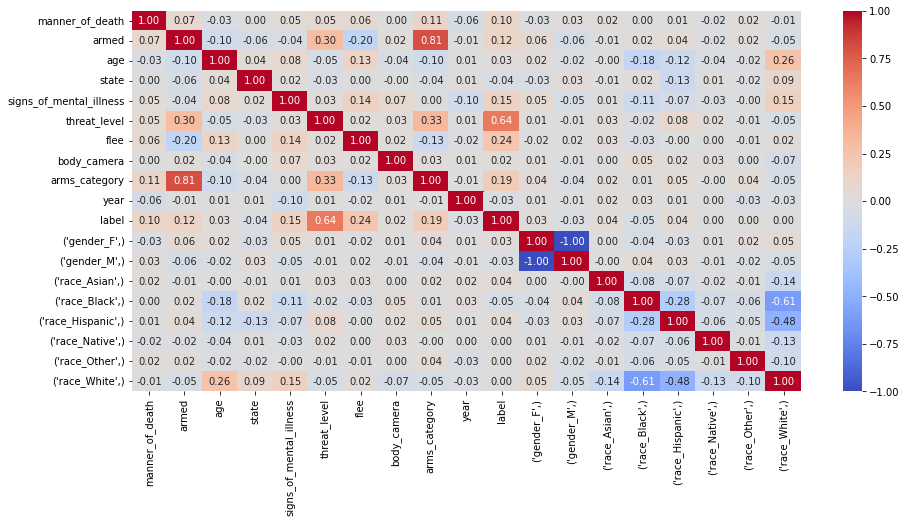

In [151]:
#using a heatmap to assess multicollinearity

plt.figure(figsize=(15,7))

sns.heatmap(train_data.corr(), cbar=True, fmt='.2f', annot=True, cmap="coolwarm")

In [152]:
#dropping the highly correlated variables from both data subsets

train_data.drop(["flee", "threat_level", "arms_category"], axis = 1, inplace = True)

test_data.drop(["flee", "threat_level", "arms_category"], axis = 1, inplace = True)

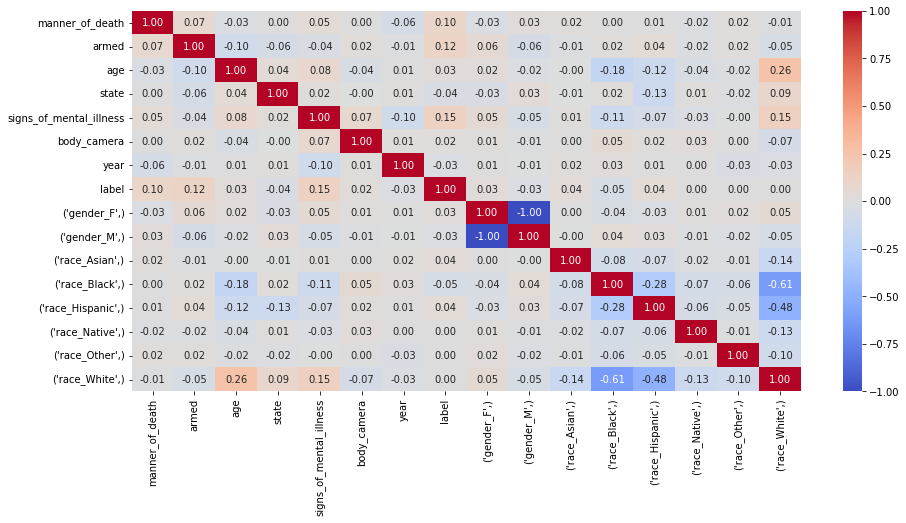

In [153]:
#re-assessing for multicollinearity

plt.figure(figsize=(15,7))

sns.heatmap(train_data.corr(), cbar=True, fmt='.2f', annot=True, cmap="coolwarm")

In [158]:
#specifying the dependent and independent variables for both subsets
x = train_data.drop(columns=["label"])
y = train_data["label"]

x_test = test_data.drop(columns=["label"])
y_test = test_data["label"]

In [159]:
#assessing for balance
y.value_counts()

0    2691
1     735
Name: label, dtype: int64

In [160]:
#using smote to balance the data by over-sampling
smote = SMOTE(random_state = 2)
x_bal, y_bal = smote.fit_resample(x, y)

y_bal.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


1    2691
0    2691
Name: label, dtype: int64

In [161]:
#performing the decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_bal, y_bal)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier()

In [168]:
#making predictions using the trained model
preds = dtc.predict(x_test)
preds

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


array([1, 1, 0, ..., 0, 0, 1])

In [169]:
#evaluating the performance of the model using f1 score
f1_score(y_test, preds)

0.3821478382147838

The metric score above indicates that this model performed correctly at 38.21% of the times, which is poor.

In [170]:
#evaluating performance using confusion matrix
confusion_matrix(y_test, preds)

array([[889, 249],
       [194, 137]])

The evaluation above showed that the model predicted class 0 better than class 1.

It correctly predicted 889 cases of class 0 and wrongly predicted 249 cases.
It also correctly predicted 137 cases of class 1 and wrongly predicted 194 cases of class 1.